In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

print(torch.__version__)
print(torch.cuda.is_available())

1.6.0
True


# 1. Dataset
- Simulate
$$ y = \cos(2x_1) + cos(3x_2) $$

In [2]:
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

In [3]:
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


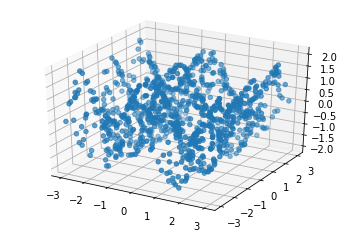

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)
plt.show()

#### transform to torch tensors

In [5]:
X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(y.astype(np.float32).reshape(-1, 1))

In [6]:
print(X_train.shape)
print(y_train.shape)

torch.Size([1000, 2])
torch.Size([1000, 1])


# 2. Model

In [7]:
import torch.nn as nn

# model
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

# Loss
mse_loss = nn.MSELoss()

# Optimizer
adam_opt = torch.optim.Adam(model.parameters(), lr=0.01)

In [8]:
def fit(X_train, y_train, model, loss_fn, optimizer, epochs=1000):
    train_losses = np.zeros(epochs)
    for i in range(epochs):
        # zero the gradients
        optimizer.zero_grad()

        # Forward
        y_train_ = model(X_train)
        loss = loss_fn(y_train_, y_train)
            
        # Backward
        loss.backward()
        optimizer.step()

        # Save losses
        train_losses[i] = loss.item()
            
        if (i + 1) % 100 == 0:
            print(f'Epoch {i+1}/{epochs}, Train Loss: {loss.item():.4f}')

    # Plot
    plt.plot(train_losses)

# 3. Train 

Epoch 100/1000, Train Loss: 0.2834
Epoch 200/1000, Train Loss: 0.0714
Epoch 300/1000, Train Loss: 0.0084
Epoch 400/1000, Train Loss: 0.0138
Epoch 500/1000, Train Loss: 0.0037
Epoch 600/1000, Train Loss: 0.0026
Epoch 700/1000, Train Loss: 0.0025
Epoch 800/1000, Train Loss: 0.0019
Epoch 900/1000, Train Loss: 0.0018
Epoch 1000/1000, Train Loss: 0.0054


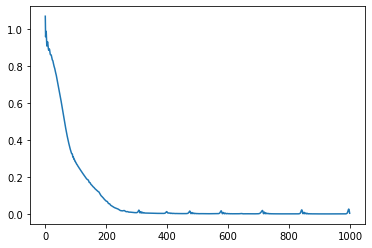

In [9]:
fit(X_train, y_train,
    model=model, loss_fn=mse_loss, optimizer=adam_opt,
    epochs=1000)

# 4. Test

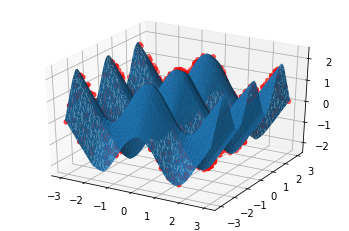

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, color="red")

# surface plot
with torch.no_grad():
    line = np.linspace(-3, 3, 50)
    xx, yy = np.meshgrid(line, line)

    Xgrid = np.vstack((xx.flatten(), yy.flatten())).T

    # Convert to torch tensor
    Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))

    # fit
    y_grid_ = model(Xgrid_torch).numpy().flatten()

    # plot
    ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], y_grid_, linewidth=0.2, antialiased=True)
    plt.show()